In [51]:
import pandas as pd
import numpy as np
import os
from feature_extract import ExtractFeature

# read preprocessed data
cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/preprocessing_data.csv")
df.to_csv(cwd + "/data_csv/feature_data.csv", index=False)

In [52]:
df.groupby('emotion').count()

df

,image,emotion
0,facial-expressions_2868585k.jpg,7
1,facial-expressions_2868582k.jpg,3
2,Aaron_Peirsol_0003.jpg,4
3,Aaron_Sorkin_0002.jpg,4
4,Abdel_Nasser_Assidi_0002.jpg,5
...,...,...
24108,SURPRISE/surprise (971).png,7
24109,SURPRISE/surprise (978).jpg,7
24110,SURPRISE/surprise (981).png,7
24111,SURPRISE/surprise (983).jpg,7


In [53]:
def get_distance(fist_point, second_point):
    distance =  math.sqrt(math.pow(fist_point[0] - second_point[0], 2) + math.pow(fist_point[1] - second_point[1], 2))
    return abs(distance)

def get_angle(first_point, second_point):
    value = (second_point[1] - first_point[1]) / (second_point[0] - first_point[0])
    angle = math.atan(value)
    return angle

len(df)


24113

In [54]:
import cv2, math, numpy as np, dlib
from imutils import face_utils

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(cwd + "/predictor/shape_predictor_68_face_landmarks.dat")

error = []
feature_list = { # [ Feature At 9/4/2022 ]
    "a_top_mouth" : [],
    "a_down_mouth" : [],
    "a_left_mouth" : [],
    "a_right_mouth" : [],
    "a_nose" : [],
    "a_mouth_last_nose": [],
    "a_right_cheek_eye": [],
    "a_left_cheek_eye": [],
    "a_left_eye": [],
    "a_right_eye": [],
    "a_left_eyebrow": [],
    "a_right_eyebrow": [],
    "d_left_eye": [],
    "d_right_eye": [],
    "w_mouth" : [],
    "h_mouth": [],
    "d_top_mouth_chin": [],
    "a_left_mouth_nose": [],
    "a_right_mouth_nose": [],
    "d_top_left_eye_eyebrow": [],
    "d_top_right_eye_eyebrow": [],
    "d_down_mouth_chin" : [],
    "circum_mouth" : []
}
# run each row in train.csv
for idx, row in df.iterrows():
    try:
        imagePath = cwd + "/cleaned_images/" + row.image
        image = cv2.imread(imagePath)

        rects = detector(image, 0)

        xlist = []
        ylist = []
        # loop over the face detections
        for (i, rect) in enumerate(rects):
            # determine the facial landmarks and convert the facial landmark (x, y)
            shape = predictor(image, rect)
            shape = face_utils.shape_to_np(shape)

            # loop over coordinates, draw them on the image and store coordinates in two lists
            for (x, y) in shape:
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
                xlist.append(x)
                ylist.append(y)

        # get mean of both axes to determine centre of gravity
        if(len(xlist) == 0 or len(ylist) == 0):
            error.append(idx)
            continue
        extract = ExtractFeature(xlist, ylist)


        feature_list["a_top_mouth"].append(extract.get_angle(49, 52, 55))
        feature_list["a_down_mouth"].append(extract.get_angle(49, 58, 55))
        feature_list["a_left_mouth"].append(extract.get_angle(50, 49, 60))
        feature_list["a_right_mouth"].append(extract.get_angle(52, 55, 58))
        feature_list["a_nose"].append(extract.get_angle(32, 34, 36))
        feature_list["a_mouth_last_nose"].append(extract.get_angle(49, 34, 55))
        feature_list["a_right_cheek_eye"].append(extract.get_angle(55, 16, 36))
        feature_list["a_left_cheek_eye"].append(extract.get_angle(49, 2, 32))
        feature_list["a_left_eye"].append(extract.get_angle(38, 37, 42))
        feature_list["a_right_eye"].append(extract.get_angle(45, 46, 47))
        feature_list["a_left_eyebrow"].append(extract.get_angle(18, 20, 22))
        feature_list["a_right_eyebrow"].append(extract.get_angle(23, 25, 27))
        feature_list["d_left_eye"].append(extract.get_distance(37, 40))
        feature_list["d_right_eye"].append(extract.get_distance(43, 46))
        feature_list["w_mouth"].append(extract.get_distance(49, 55))
        feature_list["h_mouth"].append(extract.get_distance(52, 58))
        feature_list["d_top_mouth_chin"].append(extract.get_distance(52, 9))
        feature_list["a_left_mouth_nose"].append(extract.get_angle(3, 49, 34))
        feature_list["a_right_mouth_nose"].append(extract.get_angle(34, 55, 15))
        feature_list["d_top_left_eye_eyebrow"].append(extract.get_distance(40, 22))
        feature_list["d_top_right_eye_eyebrow"].append(extract.get_distance(43, 23))
        feature_list["d_down_mouth_chin"].append(extract.get_distance(58, 9))
        feature_list["circum_mouth"].append(
            sum(
                [extract.get_distance(x, x + 1) for x in range(61, 68)] + 
                [extract.get_distance(61, 68)]
            )
        )
    # cv2.circle(image, (int(xmean), int(ymean)), 1, (0, 255, 0), -1)

    except:
        error.append(idx)
        continue

/Users/pongsakorn/Desktop/Workspace/python/facial_cleandata/feature_extract.py:18: RuntimeWarning: divide by zero encountered in long_scalars
  alpha = math.atan( (y[p1] - y[p2]) / (x[p1] - x[p2]) )
/Users/pongsakorn/Desktop/Workspace/python/facial_cleandata/feature_extract.py:17: RuntimeWarning: divide by zero encountered in long_scalars
  beta = math.atan( (y[p3] - y[p2]) / (x[p3] - x[p2]) )
[ WARN:0@3430.836] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/pongsakorn/Desktop/Workspace/python/facial_cleandata/cleaned_images/ANGER/anger (1001).jpg'): can't open/read file: check file path/integrity
[ WARN:0@3430.836] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/pongsakorn/Desktop/Workspace/python/facial_cleandata/cleaned_images/ANGER/anger (1001).png'): can't open/read file: check file path/integrity
[ WARN:0@3430.836] gl

In [55]:
# df = new_df.copy()
print(len(error))
new_df = df.copy()
new_df['emotion']

8236


0        7
1        3
2        4
3        4
4        5
        ..
24108    7
24109    7
24110    7
24111    7
24112    7
Name: emotion, Length: 24113, dtype: int64

In [56]:
df.drop(error, axis=0, inplace=True)
print(len(df))

15877


In [57]:
# add feature to df
df["a_top_mouth"] = feature_list["a_top_mouth"]  
df["a_down_mouth"] = feature_list["a_down_mouth"] 
df["a_left_mouth"] = feature_list["a_left_mouth"] 
df["a_right_mouth"] = feature_list["a_right_mouth"] 
df["a_nose"] = feature_list["a_nose"] 
df["a_mouth_last_nose"] = feature_list["a_mouth_last_nose"] 
df["a_right_cheek_eye"] = feature_list["a_right_cheek_eye"] 
df["a_left_cheek_eye"] = feature_list["a_left_cheek_eye"] 
df["a_left_eye"] = feature_list["a_left_eye"] 
df["a_right_eye"] = feature_list["a_right_eye"] 
df["a_left_eyebrow"] = feature_list["a_left_eyebrow"] 
df["a_right_eyebrow"] = feature_list["a_right_eyebrow"] 
df["d_left_eye"] = feature_list["d_left_eye"] 
df["d_right_eye"] = feature_list["d_right_eye"] 
df["w_mouth"] = feature_list["w_mouth"] 
df["h_mouth"] = feature_list["h_mouth"] 
df["d_top_mouth_chin"] = feature_list["d_top_mouth_chin"] 
df["a_left_mouth_nose"] = feature_list["a_left_mouth_nose"] 
df["a_right_mouth_nose"] = feature_list["a_right_mouth_nose"] 
df["d_top_left_eye_eyebrow"] = feature_list["d_top_left_eye_eyebrow"] 
df["d_top_right_eye_eyebrow"] = feature_list["d_top_right_eye_eyebrow"] 
df["d_down_mouth_chin"] = feature_list["d_down_mouth_chin"]  
df["circum_mouth"] = feature_list["circum_mouth"]  
# 20 Features


In [58]:
df
new_df = df.copy()
df['emotion']

0        7
1        3
2        4
3        4
4        5
        ..
24099    7
24102    7
24105    7
24107    7
24109    7
Name: emotion, Length: 15877, dtype: int64

In [59]:
df.groupby('emotion').count()

,image,a_top_mouth,a_down_mouth,a_left_mouth,a_right_mouth,a_nose,a_mouth_last_nose,a_right_cheek_eye,a_left_cheek_eye,a_left_eye,...,d_right_eye,w_mouth,h_mouth,d_top_mouth_chin,a_left_mouth_nose,a_right_mouth_nose,d_top_left_eye_eyebrow,d_top_right_eye_eyebrow,d_down_mouth_chin,circum_mouth
emotion,,,,,,,,,,,,,,,,,,,,,
0,1145,1145,1145,1145,1145,1145,1145,1145,1145,1145,...,1145,1145,1145,1145,1145,1145,1145,1145,1145,1145
1,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474,...,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474
2,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062,...,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062
3,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,...,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
4,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,...,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146
5,4137,4137,4137,4137,4137,4137,4137,4137,4137,4137,...,4137,4137,4137,4137,4137,4137,4137,4137,4137,4137
6,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,...,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
7,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345,...,1345,1345,1345,1345,1345,1345,1345,1345,1345,1345


23


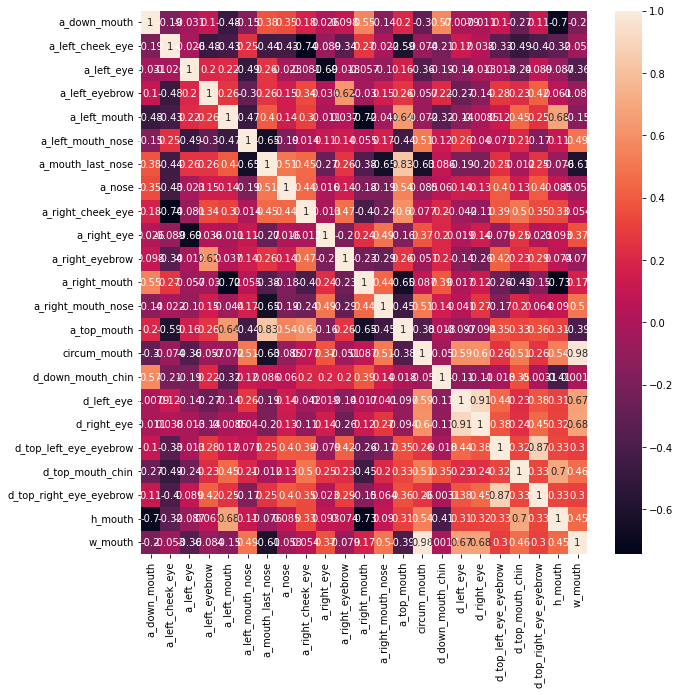

In [60]:
import seaborn as sns
from matplotlib import pyplot as plt
X = df[df.columns.difference(['Unnamed: 0', 'emotion', 'image'])]
corr = X.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot=True)
print(len(X.columns))


In [61]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[0]):
        if corr.iloc[i, j] >= 0.9:
            if columns[j]:
                columns[j] = False

print("Filter Method : ", len(corr.columns[columns]))
selected_columns = list(corr.columns[columns]) + ['emotion', 'image']
print(selected_columns)
# data = corr[selected_columns]
# print(selected_columns)
# selected_columns.append('emotion')

Filter Method :  21
['a_down_mouth', 'a_left_cheek_eye', 'a_left_eye', 'a_left_eyebrow', 'a_left_mouth', 'a_left_mouth_nose', 'a_mouth_last_nose', 'a_nose', 'a_right_cheek_eye', 'a_right_eye', 'a_right_eyebrow', 'a_right_mouth', 'a_right_mouth_nose', 'a_top_mouth', 'circum_mouth', 'd_down_mouth_chin', 'd_left_eye', 'd_top_left_eye_eyebrow', 'd_top_mouth_chin', 'd_top_right_eye_eyebrow', 'h_mouth', 'emotion', 'image']


In [62]:
df_filter = new_df.copy()
print(new_df)
df_filter = df_filter[selected_columns]
print(df_filter)

                                 image  emotion  a_top_mouth  a_down_mouth  \
0      facial-expressions_2868585k.jpg        7     0.863318     -1.448714   
1      facial-expressions_2868582k.jpg        3     0.277425     -0.752981   
2               Aaron_Peirsol_0003.jpg        4     0.061244     -1.197187   
3                Aaron_Sorkin_0002.jpg        4     0.118886     -1.223167   
4         Abdel_Nasser_Assidi_0002.jpg        5     0.505814     -0.610528   
...                                ...      ...          ...           ...   
24099       SURPRISE/surprise (91).jpg        7     0.650085     -0.422672   
24102      SURPRISE/surprise (941).png        7     0.206163     -1.623281   
24105      SURPRISE/surprise (967).png        7     0.150027     -1.147505   
24107      SURPRISE/surprise (970).png        7     0.218669     -1.544912   
24109      SURPRISE/surprise (978).jpg        7     1.042424     -1.538137   

       a_left_mouth  a_right_mouth    a_nose  a_mouth_last_nose

/var/folders/dj/6xj2_ws50cn8fvd7lpqt77l80000gn/T/ipykernel_37483/3834602630.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


<AxesSubplot:>

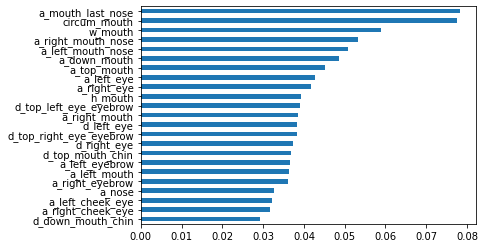

In [63]:
# Critical To Model (Feature important)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=7)

X = df[df.columns.difference(['emotion', 'image'])]
y = df[['emotion']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)  

fs = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs.plot(kind='barh')

In [64]:
important = list(model.feature_importances_)
print(important)

[0.0487362016972272, 0.03220806459582548, 0.042745121546581416, 0.03651048034473891, 0.03647113689189579, 0.050836782726054, 0.07821850363930727, 0.03276974526523788, 0.03164430783238195, 0.04180872469048079, 0.036170136391401785, 0.03857392747059002, 0.05327014989682428, 0.04515697434480806, 0.07762228178769803, 0.02923304433938184, 0.03836109791718879, 0.03729331181852575, 0.039004146185897, 0.03673726575599112, 0.03830986106940568, 0.03932022500392622, 0.05899850878863084]


In [65]:
# Wrapper (Backward Elimination)
import statsmodels.api as sm
from sklearn.feature_selection import RFE

X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const                      3.217983e-02
a_down_mouth               4.521008e-14
a_left_cheek_eye           3.807945e-01
a_left_eye                 6.982141e-02
a_left_eyebrow             3.908733e-04
a_left_mouth               1.617988e-09
a_left_mouth_nose          6.222110e-01
a_mouth_last_nose          3.379370e-02
a_nose                     3.985483e-02
a_right_cheek_eye          3.439598e-02
a_right_eye                2.141477e-02
a_right_eyebrow            3.905371e-03
a_right_mouth              5.208656e-07
a_right_mouth_nose         5.390539e-03
a_top_mouth                1.923104e-10
circum_mouth               1.756914e-04
d_down_mouth_chin          2.843289e-02
d_left_eye                 2.328654e-01
d_right_eye                3.517432e-02
d_top_left_eye_eyebrow     1.134017e-08
d_top_mouth_chin           4.333977e-02
d_top_right_eye_eyebrow    7.156698e-13
h_mouth                    1.037944e-02
w_mouth                    3.979969e-01
dtype: float64

In [66]:
cols = list(X.columns)
pmax = 1

while len(cols) > 0:
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)

    model = sm.OLS(y,X_1).fit()

    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if pmax > 0.05 :
        cols.remove(feature_with_p_max)
    else:
        break

selected_features_BE = list(cols)
print("Number of Feature Selected BE : ", len(selected_features_BE))
print(selected_features_BE)

Number of Feature Selected BE :  17
['a_down_mouth', 'a_left_eyebrow', 'a_left_mouth', 'a_mouth_last_nose', 'a_nose', 'a_right_cheek_eye', 'a_right_eye', 'a_right_eyebrow', 'a_right_mouth', 'a_right_mouth_nose', 'a_top_mouth', 'circum_mouth', 'd_down_mouth_chin', 'd_right_eye', 'd_top_left_eye_eyebrow', 'd_top_right_eye_eyebrow', 'h_mouth']


In [67]:
from sklearn.linear_model import LinearRegression

#no of features
nof_list = np.arange(1,21)            
high_score = 0

#Variable to store the optimum features
nof = 0           
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)

    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])

    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)

    model.fit(X_train_rfe,y_train)

    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if score > high_score:
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 19
Score with 19 features: 0.132086


In [68]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=14)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y) 
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = list(temp[temp==True].index)
print("Number of feature rfe : ", len(selected_features_rfe))

# end of Wrapper (Backward Elimination)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  9  2  8  7  6  3  5  4 10]
Number of feature rfe :  14


In [69]:
# selected_features_rfe = selected_features_rfe.extend(['emotion', 'image'])
selected_features_rfe = ['image', 'emotion'] + selected_features_rfe
df_wrapper = new_df.copy()
df_wrapper = df_wrapper[selected_features_rfe]
df_wrapper.to_csv(cwd + "/data_csv/use_feature_data_wrapper.csv", index=False)


In [70]:
# Embedded
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.455372
Best score using built-in LassoCV: 0.118214


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.46785198106227, tolerance: 5.495058924494128
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440.57084616541397, tolerance: 5.495058924494128
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did no

In [71]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 18 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

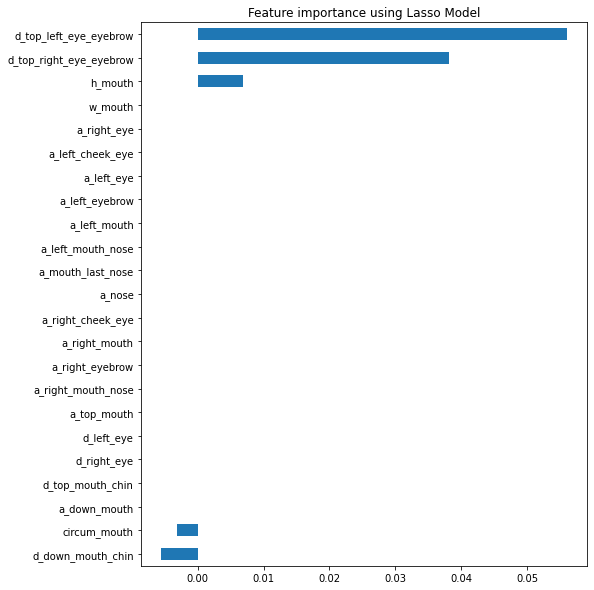

In [72]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [74]:
feature_selected_embed = [
    'image',
    'emotion',
    'd_top_left_eye_eyebrow',
    'd_top_right_eye_eyebrow', 
    'circum_mouth',
    'h_mouth',
    'd_down_mouth_chin'
]
df_embedded = new_df.copy()
df_embedded = df_embedded[feature_selected_embed]
print(len(df_embedded.columns))
df_embedded.to_csv(cwd + "/data_csv/use_feature_data_embedded.csv", index=False)


7


In [75]:
# Wrapper Methods
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(n_estimators = 100)
selector = RFE(estimator, step= 1)
selector = selector.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

In [76]:
sel_cols = np.array(X.columns)[selector.support_]
sel_cols

array(['a_down_mouth', 'a_left_eyebrow', 'a_left_mouth_nose',
       'a_mouth_last_nose', 'a_right_eye', 'a_right_mouth_nose',
       'a_top_mouth', 'circum_mouth', 'd_left_eye',
       'd_top_right_eye_eyebrow', 'h_mouth'], dtype=object)

In [77]:
df_embedded_2 = new_df.copy()
df_embedded_2 = df_embedded_2[['image', 'emotion'] + list(sel_cols)]
df_embedded_2.to_csv(cwd + "/data_csv/use_feature_data_embedded_2.csv", index=False)

KeyError: "['a_down_mouth', 'a_left_eyebrow', 'a_left_mouth_nose', 'a_mouth_last_nose', 'a_right_eye', 'a_right_mouth_nose', 'a_top_mouth', 'd_left_eye'] not in index"